In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns

In [51]:
df = pd.read_csv("heart_risk_cleaned.csv")
y_input = "Heart Attack Risk"
df.head()

,Patient ID,Age,Sex,Cholesterol,Hypertension,Heart Rate,Diabetes,Family History,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Stress Level,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,BMW7812,1,1,1,1,1,0,0,1,0,1,1,0,1,4,3,2,0,0,0
1,CZE1114,0,1,2,1,1,1,1,1,1,0,0,1,0,4,2,2,0,1,0
2,BNI9906,0,0,2,1,1,1,0,0,0,0,2,1,1,4,2,2,0,0,0
3,JLN3497,1,1,2,1,1,1,1,1,1,1,1,1,1,3,3,2,0,0,0
4,GFO8847,1,1,2,0,1,1,1,1,0,1,0,1,1,4,1,2,0,0,0


In [52]:
#Onehot encode transform Cholesterol, Hypertension, Heart Rate, Diet, Income, BMI, Triglycerides, 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
ohetransform = ohe.fit_transform(df[['Cholesterol', 'Heart Rate', 'Diet', 'Income', 'BMI', 'Triglycerides']])

ohetransform

,Cholesterol_0,Cholesterol_1,Cholesterol_2,Heart Rate_0,Heart Rate_1,Heart Rate_2,Diet_0,Diet_1,Diet_2,Income_0,...,Income_3,Income_4,BMI_0,BMI_1,BMI_2,BMI_3,BMI_4,Triglycerides_0,Triglycerides_1,Triglycerides_2
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8759,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8760,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8761,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [53]:
df = pd.concat([df, ohetransform], axis=1).drop(columns=['Cholesterol', 'Hypertension', 'Heart Rate', 'Diet', 'Income', 'BMI', 'Triglycerides'])

Cholesterol_2  Heart Attack Risk
1.0            0                    0.366313
0.0            0                    0.275476
1.0            1                    0.210430
0.0            1                    0.147780
Name: proportion, dtype: float64


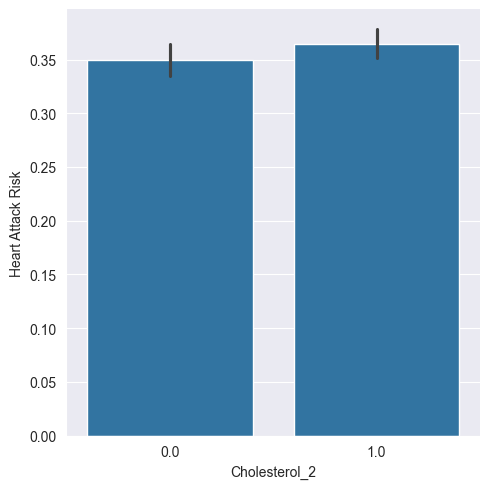

In [54]:

x_input = "Cholesterol_2"

df2 = df[[x_input, y_input]].copy()
catplot = sns.catplot(data=df, x=x_input, y=y_input, kind="bar")
print(df2.value_counts(normalize=True))


In [55]:
#Use LR model to predict new data point
heart = pd.read_csv("heart_risk_cleaned.csv")
heart.head()

,Patient ID,Age,Sex,Cholesterol,Hypertension,Heart Rate,Diabetes,Family History,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Stress Level,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,BMW7812,1,1,1,1,1,0,0,1,0,1,1,0,1,4,3,2,0,0,0
1,CZE1114,0,1,2,1,1,1,1,1,1,0,0,1,0,4,2,2,0,1,0
2,BNI9906,0,0,2,1,1,1,0,0,0,0,2,1,1,4,2,2,0,0,0
3,JLN3497,1,1,2,1,1,1,1,1,1,1,1,1,1,3,3,2,0,0,0
4,GFO8847,1,1,2,0,1,1,1,1,0,1,0,1,1,4,1,2,0,0,0


In [56]:
#create and train model with previously tuned hyperparameters
LRclass = LogisticRegression()
heart = pd.read_csv("heart_risk_cleaned.csv")
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
ohetransform = ohe.fit_transform(heart[['Cholesterol', 'Heart Rate', 'Diet', 'Income', 'BMI', 'Triglycerides']])

heart = pd.concat([heart, ohetransform], axis=1).drop(columns=['Cholesterol', 'Heart Rate', 'Diet', 'Income', 'BMI', 'Triglycerides'])
heart.insert(35, "Heart Attack Risk", heart.pop("Heart Attack Risk"))


heart_feat = heart.iloc[:, 1:35] #split into features, the things we want to input

heart_targ = heart.iloc[:, 35] # split into target, this is the thing we are looking to check given all inputs

LRclass.fit(heart_feat, heart_targ)
y_preds = LRclass.predict(heart_feat)
np.mean(y_preds == heart_targ)
heart.head()

,Patient ID,Age,Sex,Hypertension,Diabetes,Family History,Smoking,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Income_4,BMI_0,BMI_1,BMI_2,BMI_3,BMI_4,Triglycerides_0,Triglycerides_1,Heart Attack Risk,Triglycerides_2
0,BMW7812,1,1,1,0,0,1,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0
1,CZE1114,0,1,1,1,1,1,1,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0
2,BNI9906,0,0,1,1,0,0,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0
3,JLN3497,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0
4,GFO8847,1,1,0,1,1,1,0,1,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0


In [57]:
#add values for the new record you want a prediction on
patient_id = "" #not required but needed to fill the variables

age = 0 # 0 if 18-64 years, 1 if 65+

sex = 0 # 0 if Female or 1 if Male

hypertension = 0 # If diastolic is >90 or systolic is >140 when diastolic is <90 will be 1, else 0

diabetes = 0 # 0 if no diabetes or 1 if any type present

family_history = 0 # 0 if no family history of heart attack or 1 if present

smoking = 0 # 0 if no smoking history or 1 if present

alcohol = 0 # 0 if no alcohol history or 1 if present

exercise_hr_per_week = 0 # 0 if less than 2.5 hours or 150 minutes per week, or 1 if at/over

previous_heart_problem = 0 #  1 if other heart problems not discussed here, 0 if none

stress_level = 0 # if greater than 4 on scale of 10, will be 1, if 4 or less, will be 0.

activity_days_per_week = 0 # If less than 5 days of exercise per week, 0, if 5 or more, 1.

sleep_hours = 0 # If 7 or more hours per night, 1, if less than 7, 0.


#NOTE: For each group below, only one per group should be 1, all others should be 0. Only mark 1 on the active category.
cholesterol_0 = 0 # 200 or less is normal
cholesterol_1 = 0 # 200-239 is borderline high
cholesterol_2 = 0 # 240 or higher is high

heart_rate_0 = 0 # Below 60 in non-athlete could be considered bradycardia
heart_rate_1 = 0 # 60-100 is normal
heart_rate_2 = 0 # Over 100 could be considered tachycardia

diet_0 = 0 # 1 if diet is generally unhealthy, as described by patient
diet_1 = 0 # 1 if diet is average, as described by patient
diet_2 = 0 # 2 if diet is healthy, as described by patient

income_0 = 0 # less than $28,007 annual income is considered lower class
income_1 = 0 # 28,008-55,000 lower-middle
income_2 = 0 # 55,001-89,744 middle
income_3 = 0 # 89,745-149,131 upper-middle
income_4 = 0 # >149,132 upper

BMI_0 = 0 # 18.5 or below is underweight
BMI_1 = 0 # 18.5-24.9 is healthy
BMI_2 = 0 # 25-29.9 is overweight
BMI_3 = 0 # 30-39.9 is obese
BMI_4 = 0 # 40 or greater is severely obese

triglycerides_0 = 0 # 150 or below healthy
triglycerides_1 = 0 # 150-199 is borderline high
triglycerides_2 = 0 # 200-499 is high


new_record = np.array([age, sex,  hypertension, diabetes, family_history, smoking, alcohol, exercise_hr_per_week,  previous_heart_problem, stress_level,  activity_days_per_week, sleep_hours, cholesterol_0, cholesterol_1, cholesterol_2, heart_rate_0, heart_rate_1, heart_rate_2, diet_0, diet_1, diet_2, income_0, income_1,income_2, income_3, income_4, BMI_0, BMI_1, BMI_2, BMI_3, BMI_4, triglycerides_0, triglycerides_1, triglycerides_2,])

In [58]:
#Make prediction on new record with trained model
LRclass.predict(new_record.reshape(1, -1))

C:\Users\aljo9\PycharmProjects\ML_Project\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])